# Using *pymt_geotiff*: with parameters

Start by importing the GeoTiff class from `pymt` and creating an instance.

In [1]:
from pymt.models import GeoTiff
m = GeoTiff()

Next, use the *setup* method to assign values to the parameters needed by GeoTiff.

In [2]:
args = m.setup(
    "test",
    filename="https://github.com/mapbox/rasterio/raw/master/tests/data/RGB.byte.tif",
)

Pass the results from *setup* into the *initialize* method.
(This step may take a moment as data are fetched from the internet.)

In [3]:
m.initialize(*args)

*** <xarray.Rectilinear>
Dimensions:     (rank: 3)
Dimensions without coordinates: rank
Data variables:
    mesh        int64 0
    node_shape  (rank) int32 3 718 791


Note that the parameters have been correctly assigned in the component:

In [4]:
for param in m.parameters:
    print(param)

('filename', 'https://github.com/mapbox/rasterio/raw/master/tests/data/RGB.byte.tif')


What variables can be accessed from this component?

In [5]:
for var in m.output_var_names:
    print(var)

gis__raster_data
gis__coordinate_reference_system
gis__gdal_geotransform


Get the raster data values.

In [6]:
raster = m.var["gis__raster_data"].data

Let's visualize these data.

The *pymt_geotiff* component contains not only data values, but also the grid on which they're located.
Start by getting the identifier for the grid used for the raster data.

In [7]:
gid = m.var_grid("gis__raster_data")

Using the grid identifier, we can get the grid dimensions and the locations of the grid nodes.

In [8]:
shape = m.grid_shape(gid)
x = m.grid_x(gid)
y = m.grid_y(gid)
print("shape:", shape)
print("x:", x)
print("y:", y)

shape: [  3 718 791]
x: [ 102135.01896334  102435.05689001  102735.09481669  103035.13274336
  103335.17067004  103635.20859671  103935.24652339  104235.28445006
  104535.32237674  104835.36030341  105135.39823009  105435.43615676
  105735.47408344  106035.51201011  106335.54993679  106635.58786346
  106935.62579014  107235.66371681  107535.70164349  107835.73957016
  108135.77749684  108435.81542351  108735.85335019  109035.89127686
  109335.92920354  109635.96713021  109936.00505689  110236.04298357
  110536.08091024  110836.11883692  111136.15676359  111436.19469027
  111736.23261694  112036.27054362  112336.30847029  112636.34639697
  112936.38432364  113236.42225032  113536.46017699  113836.49810367
  114136.53603034  114436.57395702  114736.61188369  115036.64981037
  115336.68773704  115636.72566372  115936.76359039  116236.80151707
  116536.83944374  116836.87737042  117136.91529709  117436.95322377
  117736.99115044  118037.02907712  118337.06700379  118637.10493047
  118937.1

We're almost ready to make a plot.
Note, however, that the default behavior of `pymt` components is to flatten data arrays.

In [9]:
raster.shape

(1703814,)

Make a new variable that restores the dimensionality of the data.

In [10]:
raster3D = raster.reshape(shape)
raster3D.shape

(3, 718, 791)

Extract the red band from the image.

In [11]:
red_band = raster3D[0,:,:]
red_band.shape

(718, 791)

What information do we have about how the data are projected?

In [12]:
projection = m.var["gis__coordinate_reference_system"].data
projection

array(['+init=epsg:32618'],
      dtype='<U16')

In [13]:
transform = m.var["gis__gdal_geotransform"].data
transform

array([  3.00037927e+02,   0.00000000e+00,   1.01985000e+05,
         0.00000000e+00,  -3.00041783e+02,   2.82691500e+06])

We'll use [cartopy](https://scitools.org.uk/cartopy/docs/v0.5/index.html) to help display the data in a map projection.

In [14]:
import cartopy.crs as ccrs

The data are in [UTM zone 18N](https://epsg.io/32618),
but the projection must be set manually.
(A [note](http://xarray.pydata.org/en/stable/examples/visualization_gallery.html#imshow()-and-rasterio-map-projections) in the *xarray* documentation describes this.)

In [15]:
crs = ccrs.UTM('18N')

Display the red band of the image in the appropriate projection. 

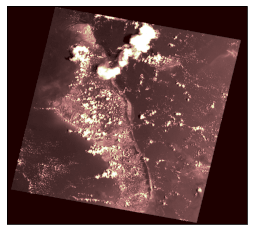

In [16]:
import matplotlib.pyplot as plt

ax = plt.subplot(projection=crs)
ax.imshow(red_band, transform=crs, extent=[x.min(),x.max(),y.min(),y.max()], cmap="pink")

Complete the example by finalizing the component.

In [17]:
m.finalize()